In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

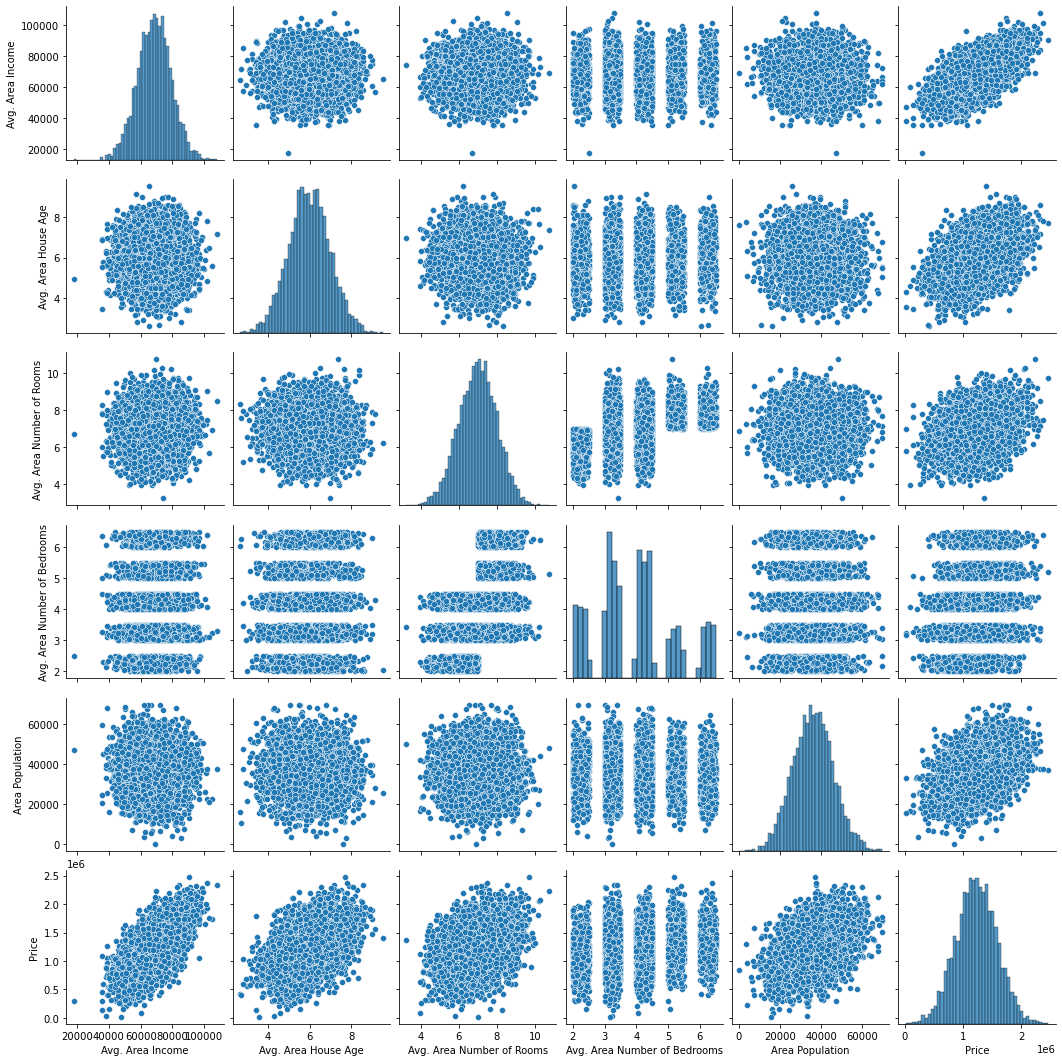

In [7]:
sns.pairplot(df)

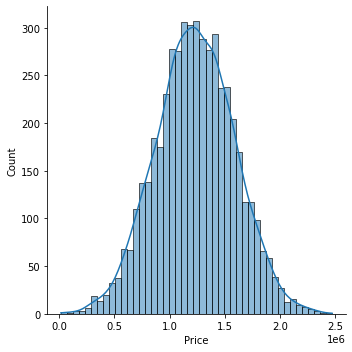

In [10]:
sns.displot(df['Price'], kde=True)

<AxesSubplot:>

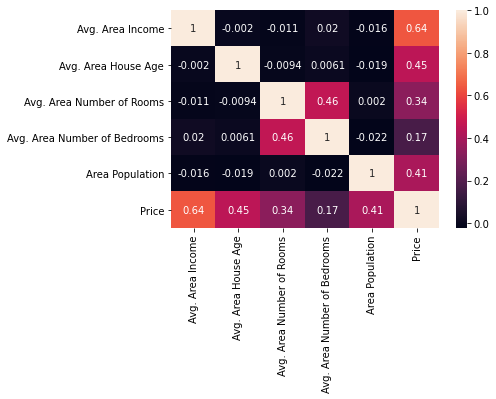

In [12]:
sns.heatmap(df.corr(), annot=True)

In [13]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [15]:
y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split

Below we have our example of how to split our data into the random sets that will be used to train and test our model. The general script itself can be found in the documentation of train_test_split using shift+tab, here on jupyter notebook..Test size is the percentage of data set aside for testing later on. Random state does not need to be specified but for the sake of showing the same results as the course, I used the same random state as the instructor.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression

We imported our machine learning model above, specifying linear regression as that is our goal. Below we create a variable which instantiates a linear regression object with LinearRegression()

In [20]:
lm = LinearRegression()

Below we fit our model with out training data, X_train and y_train

In [21]:
lm.fit(X_train, y_train)

LinearRegression()

Below we examine the intercept using variable.intercept_

In [22]:
print(lm.intercept_)

-2640159.796852669


Below we examine the coefficients of the fitted model with variable.coef_
Careful that the underscore is present.

In [23]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [24]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

Finally we create a pandas data frame containing the coefficients as data, the columns in our X_training as our indicies, and we've named the column of coefficient data 'Coeff'

In [26]:
cdf=pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coeff'])

In [27]:
cdf.head()

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Predictions time.

I have created a variable below that will house the data predicted by the model, and in it i will pass throught the test data that was set aside and never seen before by the model. I will also just have a look at the predictions as well as the y_test data in order to compare the two and see how far off  the predicted values were.

In [28]:
predictions = lm.predict(X_test)
predictions

array([1260960.70567627,  827588.7556033 , 1742421.24254342, ...,
        372191.40626916, 1365217.15140897, 1914519.5417888 ])

In [29]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

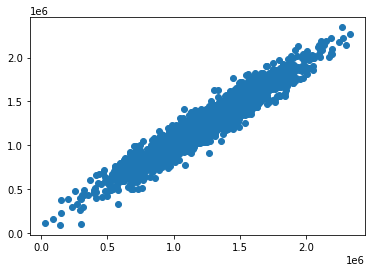

In [30]:
plt.scatter(y_test, predictions)

The above plot shows the two series of data and they line up in a very impressive way. A perfect regression would be a straight line and a poorly fitted model would be difficult to distinguish a line of any sort.

Below I have plotted the residuals on a distribution plot. The residuals (difference between the actual data and the predicted data (y_test-predictions)) in this case are pretty much perfectly normally distributed, which tells us that linear regression was a good choice on which to model our data with.

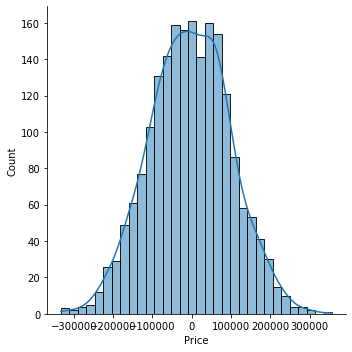

In [31]:
sns.displot((y_test-predictions), kde=True)

In [32]:
from sklearn import metrics

In [33]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914944

In [34]:
metrics.mean_squared_error(y_test, predictions)

10460958907.208952

In [36]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922290884

# Applying Linear Regression to the Boston 1973 Housing Data

Below I will more or less follow the same steps as above on real data that is apparently stored within the sklearn library to see what a linear regression on a real data set looks like.

In [39]:
from sklearn.datasets import load_boston

In [48]:
boston= load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [65]:
boston_df=pd.DataFrame(boston.data, columns=boston['feature_names'])
boston_df['Target']=boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [67]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [68]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


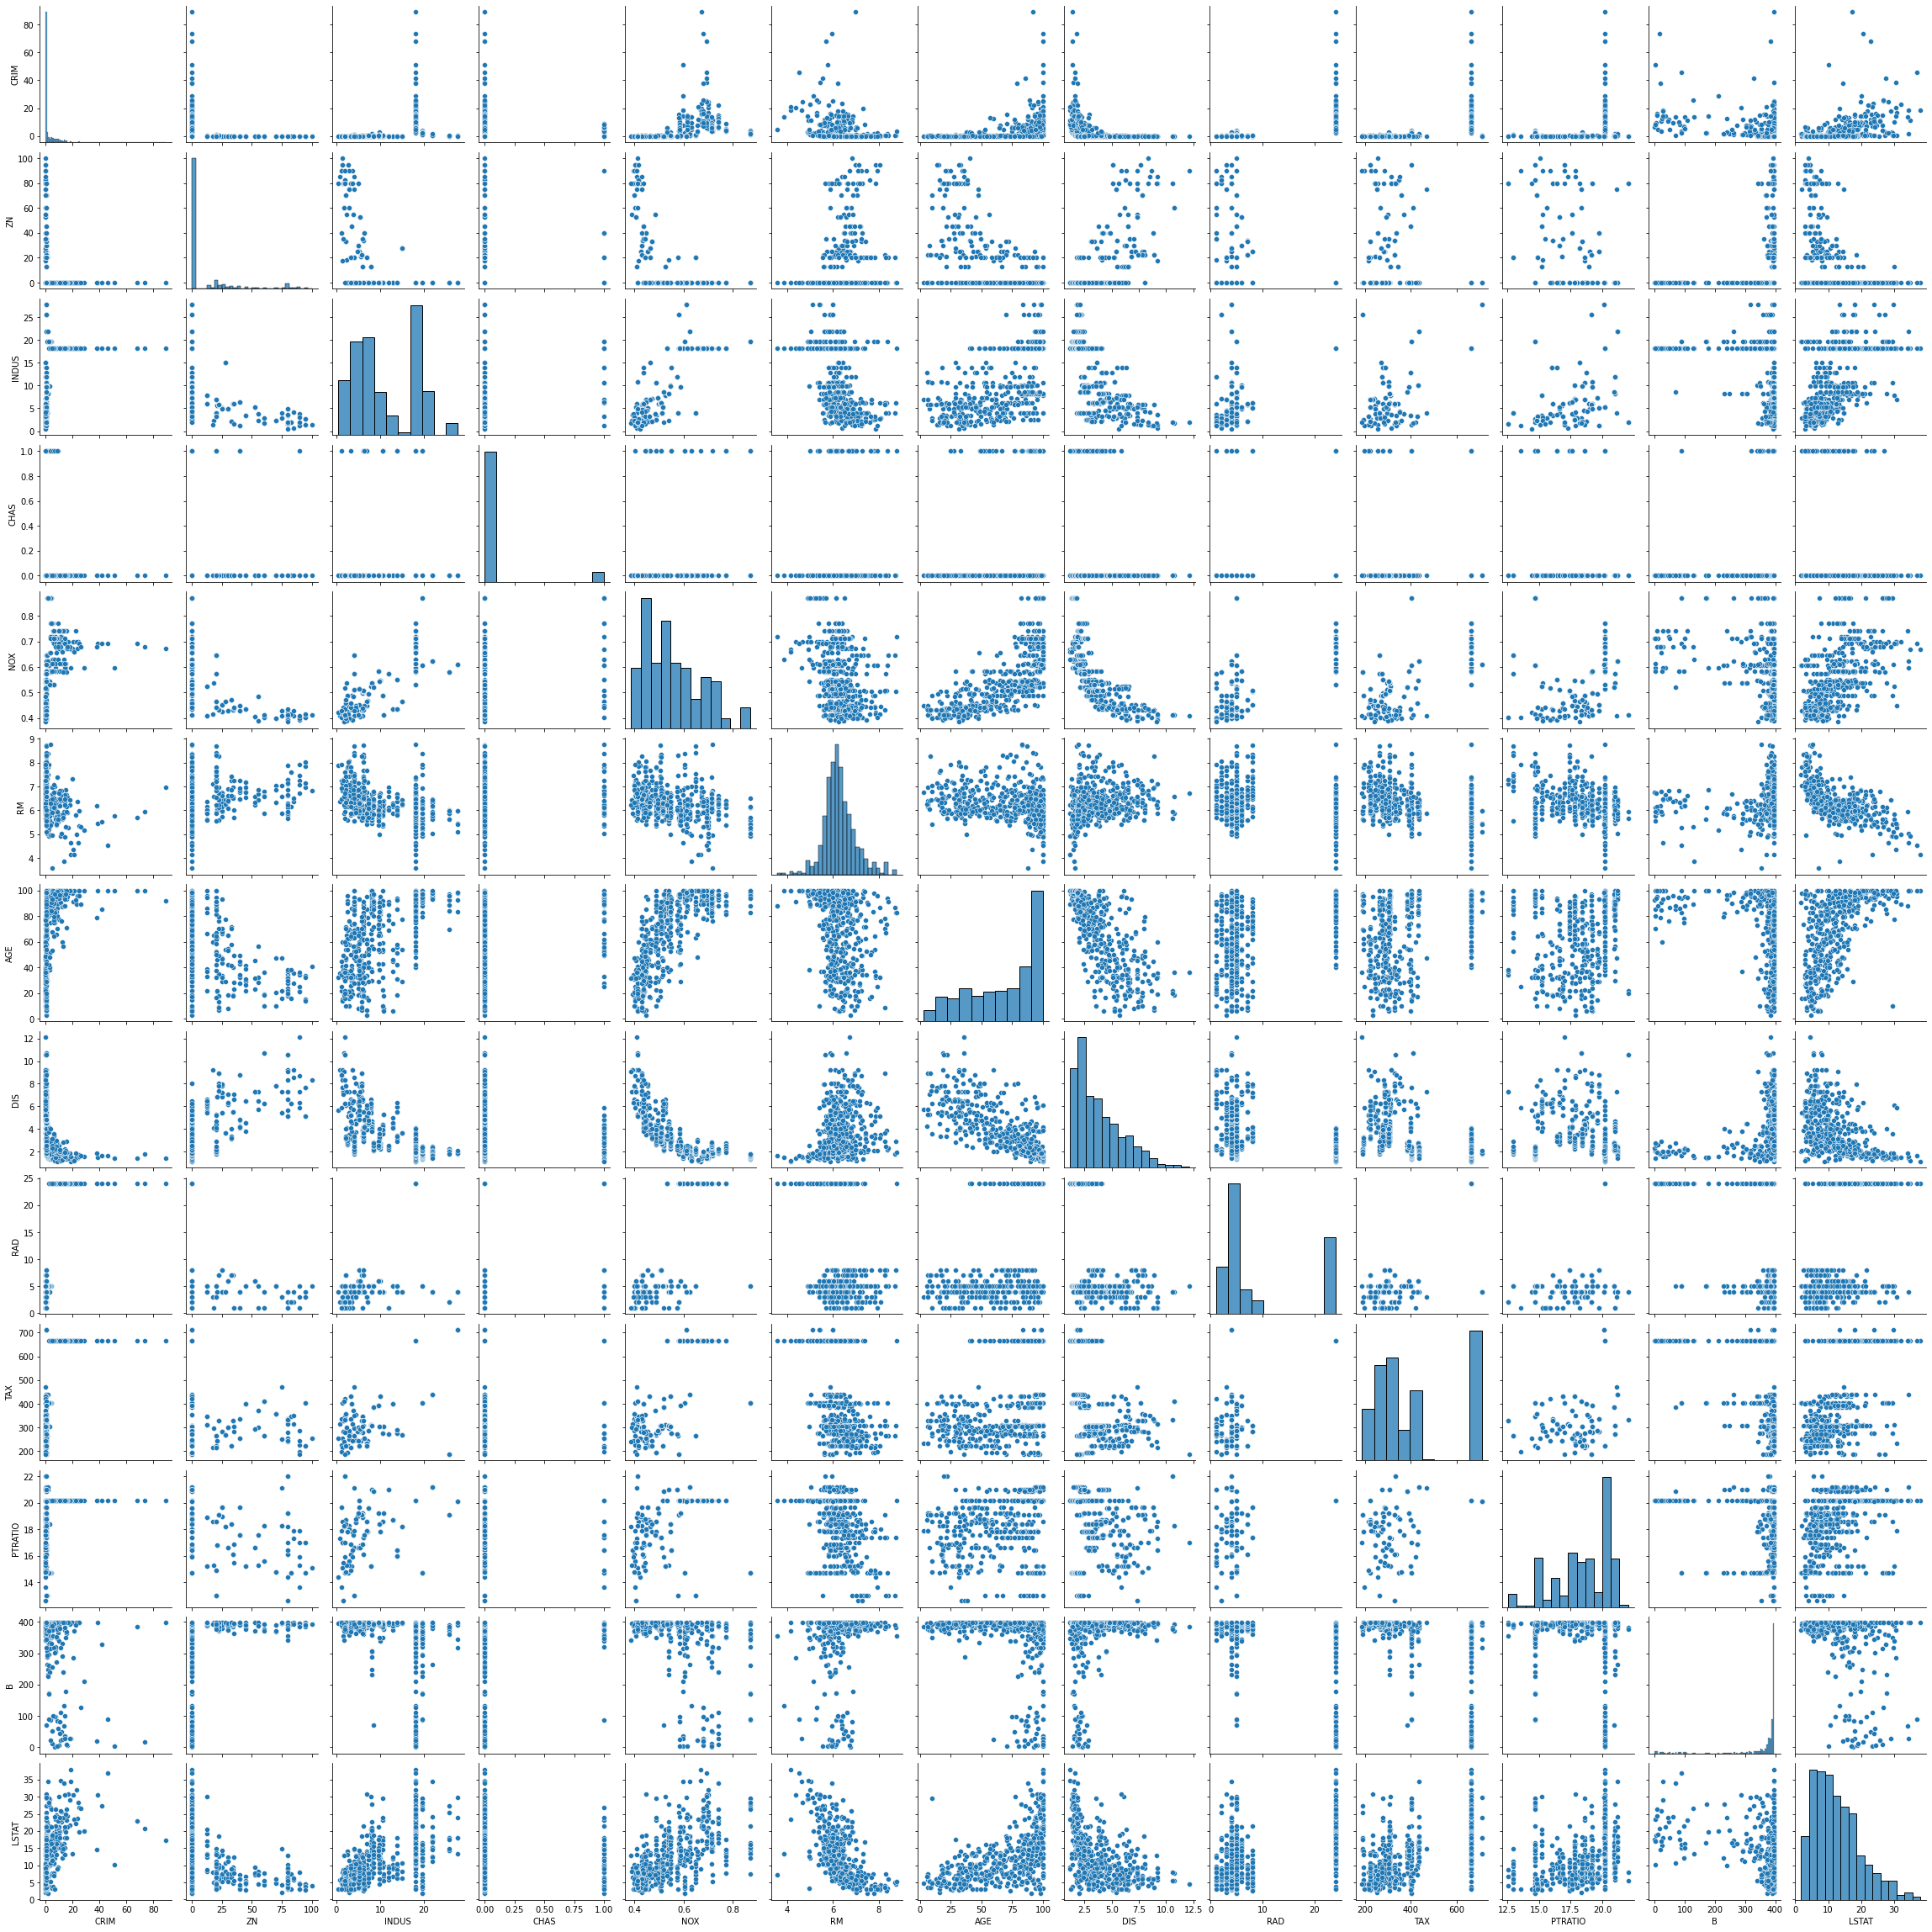

In [56]:
sns.pairplot(boston_df)

<Figure size 1008x720 with 0 Axes>

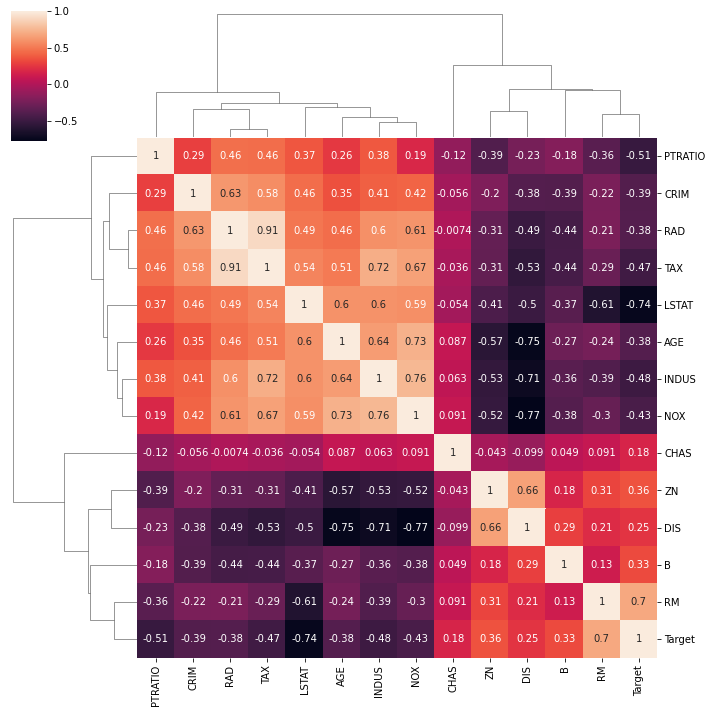

In [69]:
plt.figure(figsize=(14,10))
sns.clustermap(boston_df.corr(), annot=True)

So now I have a data frame with all the boston housing data in it, and some super basic EDA. Next I will split the data into parts for training and for testing.

In [70]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [112]:
X=boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y=boston_df['Target']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [114]:
boston_lm=LinearRegression()
boston_lm.fit(X_train, y_train)

LinearRegression()

In [115]:
print(boston_lm.intercept_)

20.9758751343223


In [116]:
boston_lm.coef_

array([-9.89079338e-02,  2.41312661e-02, -6.04803879e-03,  3.43016173e+00,
       -1.64374714e+01,  5.60356016e+00, -3.19203621e-02, -1.24260678e+00,
        2.31055770e-01, -1.04942836e-02, -8.63620272e-01,  8.63541486e-03,
       -2.46011015e-01])

In [117]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Note on the following line of code. I would get an error when I tried to create this dataframe saying something like the indecies did match up. I found that it would work if I called the columns=X_train.columns instead of index=X_train.columns, but later realized that the problem lied with my X and y variables when I set them way above. X was a list of columns and was therefore a list in a list( df[['blah','blah','blah]]) While our testing variable y was a single column in the data frame (df['onething']) But I mistakenly put it within 2 brackets, as if it was a list in a list and that is where the error lied.

In [118]:
bcdf=pd.DataFrame(data=boston_lm.coef_, index=X_train.columns, columns = ['Coeff'])
bcdf.head()

,Coeff
CRIM,-0.098908
ZN,0.024131
INDUS,-0.006048
CHAS,3.430162
NOX,-16.437471


Ok so I'm not sure why but I wasn't able to set the index to the X_train column values, something about the shape not liining up in the traceback. But the table above seems to have gone through the model regardless without a problem.
Below I will put it through the Linear Regression prediction and plot the line to see how well the model fits.

In [108]:
boston_predict = boston_lm.predict(X_test)

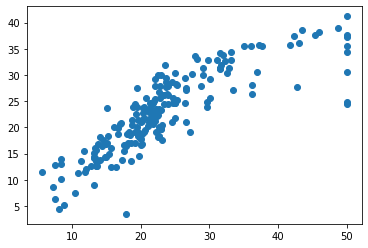

In [109]:
plt.scatter(y_test, boston_predict)

Below I have put the difference between the expected data and predicted data on a distribution and it seems to be relatively normally distributed, with some outliers on the far right.

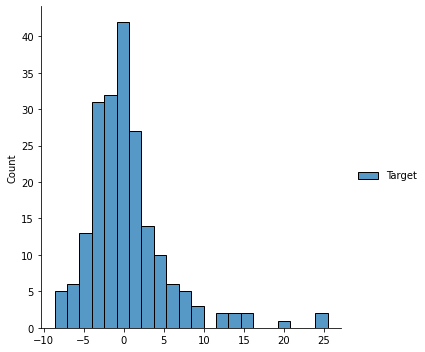

In [110]:
sns.displot(y_test-boston_predict)

Now to check the metrics(even though I don't know what that relly means yet):

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, boston_predict))
print('MSE:', metrics.mean_squared_error(y_test, boston_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, boston_predict)))

MAE: 3.3808824970159885
MSE: 26.162106148743025
RMSE: 5.114890629206359
